<a href="https://colab.research.google.com/github/Morningspread/Angry-Tweeter/blob/main/Inference_anger_RNN_V2_Nov28%2C2022ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is our inference notebook 
# Dataset: Badhresh Savani - emotion dataset 

dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

#To do: 

1.   What parts are necessary / unecessary? List item
2.   How do we bring in other datasources? 
3.   Do we have to...vectorize the tweets...
4.   What about the labels? There's some mislabelling happening... 

#Resources 

https://www.tensorflow.org/guide/keras/save_and_serialize

model = ...  # Get model (Sequential, Functional Model, or Model subclass)
model.save('path/to/location')

## 1. Installing Hugging Face's nlp package

1.   This is needed for importing the Bhadresh Savani dataset... 
2.   There is another dependency in the import section... 



In [ ]:
#Keep this until we switch out the Bhadresh Savani dataset... 

!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Importing the libraries

In [ ]:
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Let's connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Importing the Dataset

1.   This section could be replaced with another import file.. 
2.   Canonical workflow: CSV import -> DataFrame -> List -> Tokenization



In [ ]:
dataset = nlp.load_dataset('emotion')

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
#Object type: nlp.... 

type(train)

nlp.arrow_dataset.Dataset

In [ ]:
#Let's see about converting this into a pandas dataframe

df = pd.DataFrame(data=train)

#Let's look at the shape: 

print(df.shape)

print(type(df))

df.head()

(16000, 2)
<class 'pandas.core.frame.DataFrame'>


,label,text
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [ ]:
#Extracting the df to a list... and then use this as an input into a tokenizer... 
#This seems to work: list with length of 16,000 

#tweetcol= df['text'].tolist()

In [ ]:
#Function: function argument "data" is an arrow dataset
#Output: the ouptut of the function is a list.. .

def get_tweets(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [ ]:
#The function runs on an arrow objct but not a dataframe... 

#The function runs on an arrow object...  

tweets, labels = get_tweets(train)

#The function errors on the pandas dataframe object... 

#tweets, labels = get_tweets(df)


In [ ]:
#Question: What is the tweet and the labels object? 
#tweets -> train is a list (16,000) -> labels: a list (16,000)

labels?

In [ ]:
tweets[10], labels[10]

('i feel like i have to make the suffering i m seeing mean something',
 'sadness')

## 4. Tokenizing the Tweets

# Input into the tokenizer appears to be a list... verify... 

#To do - Nov 27, 2022 


1.   The input into the tokenizer appears to be a list... 
2.   What are the "acceptable" ranges for the num_words argument? I suppose that we could just play with it. 



#Importing the tokenizer and pad sequences... 

In [ ]:
#Importing the tokenizer... 

from tensorflow.keras.preprocessing.text import Tokenizer

#Importing the pad sequence... 

from tensorflow.keras.preprocessing.sequence import pad_sequences

#Instantiating the tokenizer object...

It's a: "keras.preprocessing.text.Tokenizer"

In [ ]:
#Hyperparameter: the num_words variable...not sure what 

tokenizer = Tokenizer(num_words=1000, oov_token='<UNK>')

#tokenizing works with either: "tweets" or the "tweetcol"

tokenizer.fit_on_texts(tweetcol)

#Testing out the tokenizer... 

print(tokenizer.texts_to_sequences([tweets[10]]))

[[2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84]]


In [ ]:
#What is the tweet object? 
#It's a list and each tweet is split by commas and '' 

tweets?

#Visualizing the lengths of the tweets - this can vary depending on text extraction...

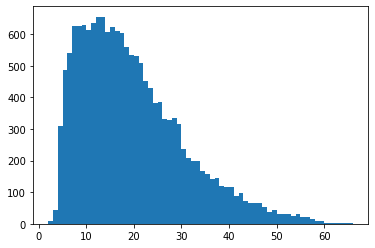

In [ ]:
#For loop for creating the lenghts of the tweets 
#I'm not really sure how this works except that 

lengths = [len(t.split(' ')) for t in tweets]

#Visualizing the tweet length - create a set object

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

## 5. Tokeninzing, Truncating and Padding Sequences



In [ ]:
#The function that tokenizes and pads the tweets... 
#The function seems to eb taking two arguments: "tokenizer" and "tweets"

def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [ ]:
#Runing the "get_sequences" tokenizer...

padded_train_sequences = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_sequences[10]

array([  2,   3,  14,   2,  21,   5,  80,   6, 733,   2,  93, 544, 304,
        84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## 6. Preparing the Labels

Nov 28, 2022: This is the part that doesn't make sense... 


In [ ]:
#Where is this object getting pulled from? It's from the function... 
#And that function is extracting from the dataset that that we no longer need... 

classes = set(labels)
print(classes)

{'love', 'fear', 'anger', 'joy', 'sadness', 'surprise'}


In [ ]:
#So, then what is the classes object? 

print(type(classes))

<class 'set'>


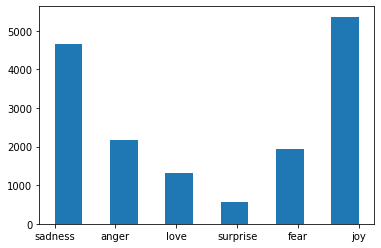

In [ ]:
#Looking at the distribution  of the data

plt.hist(labels, bins=11)
plt.show()

In [ ]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [ ]:
classes_to_index

{'love': 0, 'fear': 1, 'anger': 2, 'joy': 3, 'sadness': 4, 'surprise': 5}

In [ ]:
index_to_classes

{0: 'love', 1: 'fear', 2: 'anger', 3: 'joy', 4: 'sadness', 5: 'surprise'}

In [ ]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[10])

4


In [ ]:
#So what is train_labels then? 

train_labels?

## 8. Inference

In [ ]:
#loading the trained model - Robin's version 
#from tensorflow import keras
#model = keras.models.load_model("/content/drive/MyDrive/my_model")

In [ ]:
#Loading the model -> Anger Arousal - Oct 20, 2022 
#I'm not sure about this -> are we loading the right model...

model = keras.models.load_model("/content/drive/MyDrive/Sean/Emotion Models")

In [ ]:
#I'm not sure where this thing came from...I think it was Robin...
#But I don't think that we want to use test tweets 

#test_tweets, test_labels = get_tweets(test)
#test_sequences = get_sequences(tokenizer, test_tweets)
#test_labels = names_to_ids(test_labels)


#So let's duplicate the code and run it down here... 

train_tweets, test_labels = get_tweets(train)
train_sequences = get_sequences(tokenizer, train_tweets)
train_labels = names_to_ids(train_labels)

Inference

In [ ]:
#preds = model.predict_classes(test_sequences)
preds=model.predict(train_sequences) 
classes_x=np.argmax(preds,axis=1)
preds.shape, train_labels.shape

500/500 [==============================] - 3s 4ms/step


((16000, 5), (16000,))

In [ ]:
inf_df=pd.DataFrame({
    'data':train_tweets,
    "labels_predicted": classes_x                    
})
inf_df["label_marked"]=inf_df['labels_predicted'].apply(lambda x: index_to_classes[x])
inf_df

,data,labels_predicted,label_marked
0,i didnt feel humiliated,0,love
1,i can go from feeling so hopeless to so damned...,0,love
2,im grabbing a minute to post i feel greedy wrong,0,love
3,i am ever feeling nostalgic about the fireplac...,0,love
4,i am feeling grouchy,0,love
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,love
15996,i am now turning and i feel pathetic that i am...,0,love
15997,i feel strong and good overall,0,love
15998,i feel like this was such a rude comment and i...,0,love


In [ ]:
#What does our inf_df object look like? 

inf_df.shape

(16000, 3)

#We have an inference dataset... 

Oct 20, 2022: Before we dive into anything here...let's see what we have wtr to classifications / classes. This is one part of the code that doesn't make a lot of sense to me -> i.e. I need to better understand it. 

In [ ]:
#Let's see what it looks like...

inf_df.head()

,data,labels_predicted,label_marked
0,i didnt feel humiliated,0,love
1,i can go from feeling so hopeless to so damned...,0,love
2,im grabbing a minute to post i feel greedy wrong,0,love
3,i am ever feeling nostalgic about the fireplac...,0,love
4,i am feeling grouchy,0,love


In [ ]:
inf_df['labels_predicted'].value_counts()

0    14640
1     1049
3      229
2       82
Name: labels_predicted, dtype: int64

In [ ]:
#Let's look at the frequency of these...REmember -> I don't think that this label is working very well...
inf_df['label_marked'].value_counts()

love     14640
fear      1049
joy        229
anger       82
Name: label_marked, dtype: int64

In [ ]:
#Let's export the dataset... 


In [ ]:
#Can't get this stupid plt.hist

#Making a plot...
# df.plot.bar(x='name', rot=0);

inf_df.hist(column = 'label_marked', grid =False)

ValueError: ignored